## 3.2 사이킷런 첫걸음

In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블 : ', np.unique(y))

클래스 레이블 :  [0 1 2]


In [7]:
x.shape, y.shape

((150, 2), (150,))

In [8]:
# 계층화가 적용된 훈련, 테스트셋
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [11]:
print('y의 레이블 카운트 : ', np.bincount(y))
print('train_y의 레이블 카운트 : ', np.bincount(train_y))
print('test_y의 레이블 카운트 : ', np.bincount(test_y))

y의 레이블 카운트 :  [50 50 50]
train_y의 레이블 카운트 :  [35 35 35]
test_y의 레이블 카운트 :  [15 15 15]


In [39]:
# 표준화
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(train_x)
train_x_std = sc.transform(train_x)
test_x_std = sc.transform(test_x)

In [40]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0 = 0.1, random_state=1)
ppn.fit(train_x_std, train_y)

Perceptron(eta0=0.1, random_state=1)

In [41]:
y_pred = ppn.predict(test_x_std)

print('잘못 분류된 샘플 개수 : %d' %(test_y != y_pred).sum() )

잘못 분류된 샘플 개수 : 1


In [42]:
from sklearn.metrics import accuracy_score

print('정확도 : %.3f' %accuracy_score(test_y, y_pred))

정확도 : 0.978


In [43]:
print('정확도 : %.3f' %ppn.score(test_x_std, test_y))

정확도 : 0.978


In [44]:
# 2장에서 쓴 코드 복사해서 수정

# from matplotlib.colors import ListedColormap

# def plot_decision_regions(X, y, classifier, test_idx=None,resolution= 0.02):
#     markers = ('s', 'x', 'o', '^', 'v')
#     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#     cmap = ListedColormap(colors[:len(np.unique(y))])
    
#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
#     z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#     z = z.reshape(xx1.shape)
    
#     plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
#     plt.xlim(xx1.min(), xx1.max())
#     plt.ylim(xx2.min(), xx2.max())
    
#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x = X[y == cl, 0],
#                     y = X[y == cl, 1],
#                     alpha = 0.8,
#                     c = colors[idx],
#                     marker = markers[idx],
#                     label = cl,
#                     edgecolor='black'
#                    )
        
#     if test_idx:
#         test_x, test_y = x[test_idx, :], y[test_idx]
        
#         plt.scatter(test_x[:, 0], test_x[:, 1], facecolors='none', edgecolors='black', alpha=1.0, linewidths=1, marker='o',
#                    s=100, label='test set')
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor=None if idx==1 else 'black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [46]:
# x_combined_std = np.vstack((train_x_std, test_x_std))
# y_combined = np.hstack((train_y, test_y))

# plot_decision_regions(X = x_combined_std,
#                      y = y_combined,
#                      classifier=ppn,
#                      test_idx=range(105,150))

# plt.show()

x_combined_std = np.vstack((train_x_std, test_x_std))
y_combined = np.hstack((train_y, test_y))

plot_decision_regions(X=x_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()

TypeError: 'tuple' object is not callable

## 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링

### 3.3.1 로지스틱 회귀의 이해

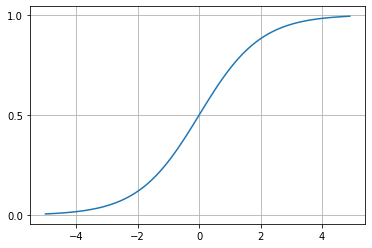

In [26]:
# 시그모이드 함수 그리기
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-5, 5, 0.1)

plt.plot(z, sigmoid(z))
plt.grid()
plt.yticks([0.0, 0.5, 1.0])
plt.show()

### 3.3.4 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_x_std, train_y)

LogisticRegression()

In [ ]:
plot_decision_regions()